In [7]:
# Import the sqlite3 module to work with SQLite databases
import sqlite3

data_file = "SQLdatabases.db"
connection = sqlite3.connect(data_file)
cursor = connection.cursor()


In [8]:
def getNumericColumns(data_file):
    numeric_columns = {}

    user_numeric_cols = ['height_cm', 'weight_kg']
    for col in user_numeric_cols:
        cursor.execute(f"SELECT {col} FROM user")
        column_data = cursor.fetchall()
        column_data = [data[0] for data in column_data]
        numeric_columns[col] = column_data

    activity_numeric_cols = ['distance_km', 'average_speed_kph']
    for col in activity_numeric_cols:
        cursor.execute(f"SELECT {col} FROM activity")
        column_data = cursor.fetchall()
        column_data = [data[0] for data in column_data]
        numeric_columns[col] = column_data


    nutrition_numeric_cols = ['protein_grams','carbohydrates_grams']
    for col in nutrition_numeric_cols:
        cursor.execute(f"SELECT {col} FROM nutrition")
        column_data = cursor.fetchall()
        column_data = [data[0] for data in column_data]
        numeric_columns[col] = column_data

    return numeric_columns

# Example usage of getNumericColumns :
numeric_columns_dict = getNumericColumns(data_file)
for column_name, column_data in numeric_columns_dict.items():
    print(f"{column_name}: {column_data}")

height_cm: [175.5, 160.2, 180.8, 165.3, 178.6, 163.7, 170.1, 155.9]
weight_kg: [70.3, 55.1, 80.5, 60.7, 75.2, 58.9, 68.4, 50.0]
distance_km: [5.5, 1.5, 10.0, 3.5, 4.0, 2.5, 8.0, 2.5]
average_speed_kph: [8.0, 1.8, 15.0, 4.5, 7.5, 2.5, 12.4, 4.0]
protein_grams: [20.5, 25.0, 30.0, 15.5, 22.0, 30.5, 35.0, 18.0, 28.0, 32.0, 38.5, 12.5, 18.0, 20.0, 28.0, 10.5, 30.0, 22.0, 35.5, 15.0, 25.0, 20.5, 30.0, 18.0, 28.0, 32.0, 38.0, 18.0, 28.0, 32.0, 38.0, 12.5]
carbohydrates_grams: [60.5, 45.5, 70.5, 40.0, 65.5, 50.0, 80.0, 50.0, 60.0, 45.0, 75.0, 30.5, 55.0, 70.5, 60.0, 25.5, 75.0, 45.0, 80.0, 40.0, 70.0, 50.5, 65.0, 45.5, 60.5, 45.0, 75.0, 50.0, 60.0, 45.0, 75.0, 25.3]


In [9]:
def getCategoricalColumns(data_file):

    categorical_columns = {}
    user_categorical_cols = ['gender_abbreviation']
    for col in user_categorical_cols:
        cursor.execute(f"SELECT {col} FROM user")
        column_data = cursor.fetchall()
        column_data = [data[0] for data in column_data]
        categorical_columns[col] = column_data


    activity_categorical_cols = ['activity_type_abbreviation']
    for col in activity_categorical_cols:
        cursor.execute(f"SELECT {col} FROM activity")
        column_data = cursor.fetchall()
        column_data = [data[0] for data in column_data]
        categorical_columns[col] = column_data


    nutrition_categorical_cols = ['meal_type_abbreviation']
    for col in nutrition_categorical_cols:
        cursor.execute(f"SELECT {col} FROM nutrition")
        column_data = cursor.fetchall()
        column_data = [data[0] for data in column_data]
        categorical_columns[col] = column_data

    return categorical_columns

# Example usage of getCategoricalColumns:
categorical_columns_dict = getCategoricalColumns(data_file)
for column_name, column_data in categorical_columns_dict.items():
    print(f"{column_name}: {column_data}")

gender_abbreviation: ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'NB']
activity_type_abbreviation: ['b', 'b', 'r', 'r', 's', 's', 'w', 'w']
meal_type_abbreviation: ['b', 'd', 'l', 's', 'b', 'd', 'l', 's', 'b', 'd', 'l', 's', 'b', 'd', 'l', 's', 'b', 'd', 'l', 's', 'b', 'd', 'l', 's', 'b', 'd', 'l', 's', 'b', 'd', 'l', 's']


In [10]:
def getFreeTextColumns(data_file):

    free_text_columns = {}
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    tables = [table[0] for table in tables]

    for table in tables:
        cursor.execute(f"PRAGMA table_info({table});")
        columns_info = cursor.fetchall()
        column_names = [col_info[1] for col_info in columns_info]
        free_text_cols = [col for col in column_names if 'app_username' in col or 'first_name' in col or 'last_name' in col]

        for col in free_text_cols:
            cursor.execute(f"SELECT {col} FROM {table};")
            column_data = cursor.fetchall()
            column_data = [data[0] for data in column_data]
            free_text_columns[f"{table}_{col}"] = column_data

    return free_text_columns

# Example usage getFreeTextColumns:
free_text_columns_dict = getFreeTextColumns(data_file)
for column_name, column_data in free_text_columns_dict.items():
    print(f"{column_name}: {column_data}")


nutrition_app_username: ['chris_j_95', 'chris_j_95', 'chris_j_95', 'chris_j_95', 'daniel_w_98', 'daniel_w_98', 'daniel_w_98', 'daniel_w_98', 'emily_b_88', 'emily_b_88', 'emily_b_88', 'emily_b_88', 'jane_smith_85', 'jane_smith_85', 'jane_smith_85', 'jane_smith_85', 'jess_taylor_83', 'jess_taylor_83', 'jess_taylor_83', 'jess_taylor_83', 'john_doe_123', 'john_doe_123', 'john_doe_123', 'john_doe_123', 'mike_m_92', 'mike_m_92', 'mike_m_92', 'mike_m_92', 'sam_d_87', 'sam_d_87', 'sam_d_87', 'sam_d_87']
activity_app_username: ['john_doe_123', 'jane_smith_85', 'chris_j_95', 'emily_b_88', 'mike_m_92', 'sam_d_87', 'daniel_w_98', 'jess_taylor_83']
user_app_username: ['chris_j_95', 'daniel_w_98', 'emily_b_88', 'jane_smith_85', 'jess_taylor_83', 'john_doe_123', 'mike_m_92', 'sam_d_87']
user_first_name: ['John', 'Jane', 'Chris', 'Emily', 'Michael', 'Samantha', 'Daniel', 'Jessica']
user_last_name: ['Doe', 'Smith', 'Johnson', 'Brown', 'Miller', 'Davis', 'Wilson', 'Taylor']


In [11]:

def getAllRows(data_file):

        result = {}
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()

        for table in tables:
            table_name = table[0]
            cursor.execute(f"SELECT * FROM {table_name};")
            rows = cursor.fetchall()
            cursor.execute(f"PRAGMA table_info({table_name});")
            columns = [column[1] for column in cursor.fetchall()]
            rows_dict = [{col: value for col, value in zip(columns, row)} for row in rows]

            result[table_name] = rows_dict



        return result

# Example usage of getAllRows
all_rows = getAllRows(data_file)
print(all_rows)


{'gender_lookup': [{'gender_abbreviation': 'm', 'description': 'male'}, {'gender_abbreviation': 'f', 'description': 'female'}, {'gender_abbreviation': 'nb', 'description': 'non-binary'}], 'meal_type_lookup': [{'meal_type_abbreviation': 'b', 'description': 'breakfast'}, {'meal_type_abbreviation': 'l', 'description': 'lunch'}, {'meal_type_abbreviation': 'd', 'description': 'dinner'}, {'meal_type_abbreviation': 's', 'description': 'snack'}], 'activity_lookup': [{'activity_abbreviation': 'r', 'description': 'running'}, {'activity_abbreviation': 's', 'description': 'swimming'}, {'activity_abbreviation': 'w', 'description': 'walking'}, {'activity_abbreviation': 'b', 'description': 'biking'}], 'nutrition': [{'app_username': 'john_doe_123', 'meal_type_abbreviation': 'b', 'calories_consumed_kcal': 500, 'protein_grams': 20.5, 'carbohydrates_grams': 60.5, 'activity_date': '2023-01-09'}, {'app_username': 'john_doe_123', 'meal_type_abbreviation': 'l', 'calories_consumed_kcal': 700, 'protein_grams':

In [14]:
def addRow(data_file, table_name, new_row):

    try:
        columns = ', '.join(new_row.keys())
        values = ', '.join(['?' for _ in new_row])
        insert_query = f"INSERT INTO {table_name} ({columns}) VALUES ({values})"
        cursor.execute(insert_query, list(new_row.values()))

        connection.commit()
        print(f"Row added successfully to {table_name}.")

    except sqlite3.Error as e:
        print(f"Error adding row to {table_name}: {e}")

    except ValueError as ve:
        print(f"Error: {ve}")

# Example usage addRow:
if __name__ == "__main__":
    data_file = "SQLdatabases.db"
    try:
        addRow(data_file, 'activity', {
            'app_username': input("Enter the app_username: "),
            'activity_type_abbreviation': input("Enter the activity type abbreviation: "),
            'duration_minutes': int(input("Enter the duration (minutes): ")),
            'distance_km': float(input("Enter the distance (km): ")),
            'calories_burned_kcal': int(input("Enter the calories burned (kcal): ")),
            'average_speed_kph': float(input("Enter the average speed (kph): ")),
            'activity_date': input("Enter the activity date (YYYY-MM-DD): "),
        })
    except ValueError as ve:
        print(f"Error: {ve}")


Enter the app_username: chris_j_95
Enter the activity type abbreviation: b
Enter the duration (minutes): 45
Enter the distance (km): 2.4
Enter the calories burned (kcal): 270
Enter the average speed (kph): 3.2
Enter the activity date (YYYY-MM-DD): 2024-06-06
Row added successfully to activity.


In [13]:
def getRows(data_file, table_name, search_criterion):

    try:
        where_clause = ' AND '.join(f"{col} = ?" for col in search_criterion)
        select_query = f"SELECT * FROM {table_name} WHERE {where_clause}"
        cursor.execute(select_query, tuple(search_criterion.values()))
        rows = cursor.fetchall()
        column_names = [description[0] for description in cursor.description]
        result = [dict(zip(column_names, row)) for row in rows]

        return result

    except sqlite3.Error as e:
        print(f"Error retrieving rows from {table_name}: {e}")
        return []



# Example usage of getRows:
if __name__ == "__main__":
    table_name = "activity"

    # Define a search criterion as a dictionary
    search_criterion = {
        'activity_type_abbreviation': 'w'
    }

    result = getRows(data_file, table_name, search_criterion)
    print(result)


[{'app_username': 'emily_b_88', 'activity_type_abbreviation': 'w', 'duration_minutes': 60, 'distance_km': 3.5, 'calories_burned_kcal': 150, 'average_speed_kph': 4.5, 'activity_date': '2023-01-04'}, {'app_username': 'jess_taylor_83', 'activity_type_abbreviation': 'w', 'duration_minutes': 50, 'distance_km': 2.5, 'calories_burned_kcal': 160, 'average_speed_kph': 4.0, 'activity_date': '2023-01-08'}]


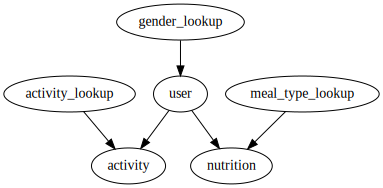

In [12]:
import graphviz
from IPython.display import display

# Create a graph
graph = graphviz.Digraph('Database Relationships', format='png')

# Define relationships
relationships = [
   ('gender_lookup', 'user'),
   ('activity_lookup', 'activity'),
   ('meal_type_lookup', 'nutrition'),
   ('user', 'activity'),
   ('user', 'nutrition')
]

# Add nodes and edges to the graph
for from_table, to_table in relationships:
    graph.node(from_table)
    graph.node(to_table)
    graph.edge(from_table, to_table)

# Save the graph as a PNG file
graph.render(filename='database_relationships', format='png', cleanup=True)

display(graph)


In [ ]:
from prettytable import PrettyTable
"""
    Display the content of a specified table in a formatted table using PrettyTable.

    Parameters:
    - data_file (str): the data file.
    - table_name (str): The name of the table to display.

    Returns:
    specified table
"""

def displayTableContent(data_file, table_name):

    rows = getAllRows(data_file)
    if table_name not in rows:
        print(f"Table '{table_name}' not found in the data file.")
        return

    print(f"\n== TABLE CONTENT: {table_name} ==")
    table = PrettyTable()
    table.field_names = list(rows[table_name][0].keys())
    for row in rows[table_name]:
        table.add_row(list(row.values()))
    print(table)

# Example usage of displayTableContent:
displayTableContent(data_file, "activity")



== TABLE CONTENT: activity ==
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  app_username  | activity_type_abbreviation | duration_minutes | distance_km | calories_burned_kcal | average_speed_kph | activity_date |
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  john_doe_123  |             r              |        45        |     5.5     |         300          |        8.0        |   2023-01-01  |
| jane_smith_85  |             s              |        60        |     1.5     |         200          |        1.8        |   2023-01-02  |
|   chris_j_95   |             b              |        30        |     10.0    |         250          |        15.0       |   2023-01-03  |
|   emily_b_88   |             w              |        60        |     3.5     |         150          |        4.5        |   202

In [ ]:
"""
Check and Add 'age' Column to the 'user' Table in an SQLite Database

"""
cursor.execute("PRAGMA table_info(user)")
columns_info = cursor.fetchall()
existing_columns = [column_info[1] for column_info in columns_info]

if 'age' not in existing_columns:
    sql_script = """
    -- Alter the table to add the 'age' column
    ALTER TABLE user
    ADD COLUMN age INTEGER;

    -- Update the 'age' column with the calculated ages
    UPDATE user
    SET age = strftime('%Y', 'now') - strftime('%Y', date_of_birth)
            - (strftime('%m-%d', 'now') < strftime('%m-%d', date_of_birth));
    """
    cursor.executescript(sql_script)
    print("The 'age' column has been added.")
else:
    print("The 'age' column already exists.")

# Display the user table after adding age column
displayTableContent(data_file, "user")

The 'age' column has been added.

== TABLE CONTENT: user ==
+----------------+------------+-----------+---------------+-----------+-----------+---------------------+-----+
|  app_username  | first_name | last_name | date_of_birth | height_cm | weight_kg | gender_abbreviation | age |
+----------------+------------+-----------+---------------+-----------+-----------+---------------------+-----+
|  john_doe_123  |    John    |    Doe    |   1990-01-15  |   175.5   |    70.3   |          M          |  34 |
| jane_smith_85  |    Jane    |   Smith   |   1985-05-22  |   160.2   |    55.1   |          F          |  39 |
|   chris_j_95   |   Chris    |  Johnson  |   1995-11-10  |   180.8   |    80.5   |          M          |  28 |
|   emily_b_88   |   Emily    |   Brown   |   1988-08-05  |   165.3   |    60.7   |          F          |  36 |
|   mike_m_92    |  Michael   |   Miller  |   1992-03-30  |   178.6   |    75.2   |          M          |  32 |
|    sam_d_87    |  Samantha  |   Davis   | 

In [ ]:
from tabulate import tabulate

"""
Display the names of all tables in the SQLite database.

Parameters:
- data_file (str): SQLite database file.
"""
def tables_names(data_file):
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    if tables:
        print("Tables in the database:")
        for table in tables:
            print(table[0])
    else:
        print("No tables found in the database.")

# Example usage of tables_names
tables_names(data_file)


"""
Display the content of all tables in the SQLite database using tabulate.

Parameters:
 - data_file (str): SQLite database file.

Returns:
 All tables
"""
def display_tables(data_file):

    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    if tables:
        for table in tables:
            table_name = table[0]
            print(f"\nTable: {table_name}")
            cursor.execute(f"SELECT * FROM {table_name};")
            rows = cursor.fetchall()
            column_names = [description[0] for description in cursor.description]
            print(tabulate(rows, headers=column_names, tablefmt="pretty"))
    else:
        print("No tables found in the database.")

# Example usage of display_tables
display_tables(data_file)


Tables in the database:
gender_lookup
meal_type_lookup
activity_lookup
nutrition
activity
user

Table: gender_lookup
+---------------------+-------------+
| gender_abbreviation | description |
+---------------------+-------------+
|          m          |    male     |
|          f          |   female    |
|         nb          | non-binary  |
+---------------------+-------------+

Table: meal_type_lookup
+------------------------+-------------+
| meal_type_abbreviation | description |
+------------------------+-------------+
|           b            |  breakfast  |
|           l            |    lunch    |
|           d            |   dinner    |
|           s            |    snack    |
+------------------------+-------------+

Table: activity_lookup
+-----------------------+-------------+
| activity_abbreviation | description |
+-----------------------+-------------+
|           r           |   running   |
|           s           |  swimming   |
|           w           |   walking   |


In [ ]:

"""

The User class represents an individual user in a health application system. It stores basic user information such as username, name, date of birth, height, weight, gender, and age. The class provides methods for updating user information, adding a new user to the database, retrieving user information by username, and displaying user details along with associated activities and nutrition entries.


"""
class User:
    def __init__(self, app_username, first_name, last_name, date_of_birth, height_cm, weight_kg, gender_abbreviation, age, data_file):
        self.app_username = app_username
        self.first_name = first_name
        self.last_name = last_name
        self.date_of_birth = date_of_birth
        self.height_cm = height_cm
        self.weight_kg = weight_kg
        self.gender_abbreviation = gender_abbreviation
        self.age = age
        self.data_file = data_file
        self.activities = []
        self.nutrition_entries = []


    """
    Update user information in the database.

    Parameters:
    - new_info_dict (dict): Dictionary containing updated user information.
    """
    def update_user_info(self, new_info_dict):
        update_query = f"UPDATE user SET "
        update_values = []

        for key, value in new_info_dict.items():
            update_query += f"{key} = ?, "
            update_values.append(value)
        update_query = update_query.rstrip(', ') + f" WHERE app_username = ?"
        update_values.append(self.app_username)
        cursor.execute(update_query, update_values)

        print(f"User information for {self.app_username} updated successfully.")

    """
    Add a new user to the database.

    Parameters:
    - new_user_dict (dict): Dictionary containing information for the new user.
    - data_file (str): SQLite database file.

    """

    @classmethod
    def add_user(cls, new_user_dict, data_file):
        insert_query = f"INSERT INTO user ({', '.join(new_user_dict.keys())}) VALUES ({', '.join(['?']*len(new_user_dict))})"
        insert_values = list(new_user_dict.values())
        cursor.execute(insert_query, insert_values)

        print(f"User {new_user_dict['app_username']} added successfully.")




    """
        Retrieve user information by username from the database.

        Parameters:
        - app_username (str): Username of the user to retrieve.
        - data_file (str): SQLite database file.

        Returns:
        User instance or None if user not found.
    """
    @classmethod
    def get_user_info_by_username(cls, app_username, data_file):

        user_query = f"SELECT * FROM user WHERE app_username = ?"
        cursor.execute(user_query, (app_username,))
        user_info = cursor.fetchone()
        user_column_names = [description[0] for description in cursor.description]
        activities_query = f"SELECT * FROM activity WHERE app_username = ?"
        cursor.execute(activities_query, (app_username,))
        activities = cursor.fetchall()
        activity_column_names = [description[0] for description in cursor.description]
        nutrition_query = f"SELECT * FROM nutrition WHERE app_username = ?"
        cursor.execute(nutrition_query, (app_username,))
        nutrition_entries = cursor.fetchall()
        nutrition_column_names = [description[0] for description in cursor.description]

        if user_info:
            user_instance = cls(*user_info, data_file)
            user_instance.activities = activities
            user_instance.nutrition_entries = nutrition_entries
            user_instance.user_column_names = user_column_names
            user_instance.activity_column_names = activity_column_names
            user_instance.nutrition_column_names = nutrition_column_names
            return user_instance
        else:
            return None



        """
        Delete a user and associated records in all tables from the SQLite database.

        Parameters:
        - app_username (str): Username of the user to be deleted.
        - data_file (str): SQLite database file.

        """
    @classmethod
    def delete_user(cls, app_username, data_file):
        try:
            connection.execute("BEGIN")
            delete_user_query = "DELETE FROM user WHERE app_username = ?"
            delete_activities_query = "DELETE FROM activity WHERE app_username = ?"
            delete_nutrition_query = "DELETE FROM nutrition WHERE app_username = ?"

            cursor.execute(delete_user_query, (app_username,))
            connection.commit()

            cursor.execute(delete_activities_query, (app_username,))
            connection.commit()

            cursor.execute(delete_nutrition_query, (app_username,))
            connection.commit()

            print(f"User {app_username} and associated records deleted successfully.")
        except sqlite3.Error as e:
            connection.rollback()
            print(f"Error deleting user and associated records: {e}")


In [ ]:

user_object = User(
    app_username=input("Enter username: "),
    first_name= input("Enter first name: "),
    last_name=input("Enter last name: "),
    date_of_birth=input("Enter date of birth: "),
    height_cm=float(input("Enter height in cm : ")),
    weight_kg=float(input("weight in kg: ")),
    gender_abbreviation=input("gender abbreviation: "),
    age=int(input("Enter age: ")),
    data_file='SQLdatabases.db'
)

User.add_user({
    'app_username': user_object.app_username,
    'first_name': user_object.first_name,
    'last_name': user_object.last_name,
    'date_of_birth': user_object.date_of_birth,
    'height_cm': user_object.height_cm,
    'weight_kg': user_object.weight_kg,
    'gender_abbreviation': user_object.gender_abbreviation,
    'age': user_object.age
}, data_file)
displayTableContent(data_file, "user")

Enter username: Manar_s_24
Enter first name: Manar
Enter last nameAlgablan
Enter date of birth: 2003-01-30
Enter height in cm : 153
weight in kg: 42
gender abbreviation: f
Enter age: 21
User Manar_s_24 added successfully.

== TABLE CONTENT: user ==
+----------------+------------+-----------+---------------+-----------+-----------+---------------------+-----+
|  app_username  | first_name | last_name | date_of_birth | height_cm | weight_kg | gender_abbreviation | age |
+----------------+------------+-----------+---------------+-----------+-----------+---------------------+-----+
|  john_doe_123  |    John    |    Doe    |   1990-01-15  |   175.5   |    70.3   |          M          |  34 |
| jane_smith_85  |    Jane    |   Smith   |   1985-05-22  |   160.2   |    55.1   |          F          |  39 |
|   chris_j_95   |   Chris    |  Johnson  |   1995-11-10  |   180.8   |    80.5   |          M          |  28 |
|   emily_b_88   |   Emily    |   Brown   |   1988-08-05  |   165.3   |    60.7

In [ ]:
# Example usage of delete_user:
if __name__ == "__main__":

    app_username_to_delete = input("Enter the app_username to delete: ")
    User.delete_user(app_username_to_delete, data_file)
displayTableContent(data_file, "user")

Enter the app_username to delete: Manar_s_24
Error deleting user and associated records: cannot start a transaction within a transaction

== TABLE CONTENT: user ==
+----------------+------------+-----------+---------------+-----------+-----------+---------------------+-----+
|  app_username  | first_name | last_name | date_of_birth | height_cm | weight_kg | gender_abbreviation | age |
+----------------+------------+-----------+---------------+-----------+-----------+---------------------+-----+
|  john_doe_123  |    John    |    Doe    |   1990-01-15  |   175.5   |    70.3   |          M          |  34 |
| jane_smith_85  |    Jane    |   Smith   |   1985-05-22  |   160.2   |    55.1   |          F          |  39 |
|   chris_j_95   |   Chris    |  Johnson  |   1995-11-10  |   180.8   |    80.5   |          M          |  28 |
|   emily_b_88   |   Emily    |   Brown   |   1988-08-05  |   165.3   |    60.7   |          F          |  36 |
|   mike_m_92    |  Michael   |   Miller  |   1992-0

In [ ]:
"""
    The Activity class represents physical activities recorded by users. It includes methods for adding, deleting,
    and retrieving activity information from the database.
"""
class Activity:
    def __init__(self, app_username, activity_type_abbreviation, duration_minutes, distance_km, calories_burned_kcal,
                 average_speed_kph, activity_date):
        self.app_username = app_username
        self.activity_type_abbreviation = activity_type_abbreviation
        self.duration_minutes = duration_minutes
        self.distance_km = distance_km
        self.calories_burned_kcal = calories_burned_kcal
        self.average_speed_kph = average_speed_kph
        self.activity_date = activity_date



    """
        Add a new activity to the database.

        Parameters:
        - new_activity_dict (dict): Dictionary containing information for the new activity.
        - data_file (str): SQLite database file.
    """
    @classmethod
    def add_activity(cls, new_activity_dict, data_file):
        insert_query = f"INSERT INTO activity ({', '.join(new_activity_dict.keys())}) " \
                       f"VALUES ({', '.join(['?'] * len(new_activity_dict))})"
        insert_values = list(new_activity_dict.values())
        cursor.execute(insert_query, insert_values)



        print(f"Activity {new_activity_dict['activity_type_abbreviation']} added successfully.")



    """
        Delete a specific activity from the database.
    """
    @classmethod
    def delete_activity(cls, app_username,activity_type_abbreviation, activity_date, data_file):
        delete_query = "DELETE FROM activity WHERE app_username = ? AND activity_type_abbreviation = ? AND activity_date = ?"
        delete_values = (app_username,activity_type_abbreviation, activity_date)

        cursor.execute(delete_query, delete_values)



        print(f"Activity {activity_date} deleted successfully.")



    """
        Retrieve all activity information for a user from the database.

        Parameters:
        - app_username (str): Username of the user.
        - data_file (str): SQLite database file.

        Returns:
        dict: A dictionary containing activity information and column names.
        """
    @classmethod
    def get_activity_info(cls, app_username, data_file):

        activity_query = "SELECT * FROM activity WHERE app_username = ?"
        cursor.execute(activity_query, (app_username,))
        activity_info = cursor.fetchall()
        activity_column_names = [description[0] for description in cursor.description]



        if activity_info:
            return {'activity_info': activity_info, 'activity_column_names': activity_column_names}
        else:
            return {'activity_info': None, 'activity_column_names': None}



In [ ]:
# Delete an activity example:
displayTableContent(data_file,"activity")
app_username_to_delete = input("Enter the app_username to delete activity: ")
activity_type_abbreviation_to_delete = input("Enter the activity type abbreviation to delete: ")
activity_date_to_delete = input("Enter the date of the activity to delete: ")
Activity.delete_activity(app_username_to_delete, activity_type_abbreviation_to_delete, activity_date_to_delete, data_file)

displayTableContent(data_file, "activity")


== TABLE CONTENT: activity ==
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  app_username  | activity_type_abbreviation | duration_minutes | distance_km | calories_burned_kcal | average_speed_kph | activity_date |
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  john_doe_123  |             r              |        45        |     5.5     |         300          |        8.0        |   2023-01-01  |
| jane_smith_85  |             s              |        60        |     1.5     |         200          |        1.8        |   2023-01-02  |
|   chris_j_95   |             b              |        30        |     10.0    |         250          |        15.0       |   2023-01-03  |
|   emily_b_88   |             w              |        60        |     3.5     |         150          |        4.5        |   202

In [ ]:
# Creating an object from the activity class
new_activity = Activity( app_username = input("Enter the app_username: "),
        activity_type_abbreviation = input("Enter the activity type abbreviation: "),
        duration_minutes= int(input("Enter the duration (minutes): ")),
        distance_km = float(input("Enter the distance (km): ")),
        calories_burned_kcal = int(input("Enter the calories burned (kcal): ")),
        average_speed_kph = float(input("Enter the average speed (kph): ")),
        activity_date = input("Enter the activity date (YYYY-MM-DD): "))

# Add a new activity example:
Activity.add_activity({ 'app_username': new_activity.app_username,
                       'activity_type_abbreviation' : new_activity.activity_type_abbreviation,
                        'duration_minutes' : new_activity.duration_minutes,
                        'distance_km': new_activity.distance_km,
                        'calories_burned_kcal' : new_activity.calories_burned_kcal,
                        'average_speed_kph' : new_activity.average_speed_kph,
                        'activity_date' : new_activity.activity_date}, data_file

)

displayTableContent(data_file, "activity")

Enter the app_username: sam_d_87
Enter the activity type abbreviation: w
Enter the duration (minutes): 60
Enter the distance (km): 3.5
Enter the calories burned (kcal): 400
Enter the average speed (kph): 5.6
Enter the activity date (YYYY-MM-DD): 2024-10-20
Activity w added successfully.

== TABLE CONTENT: activity ==
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  app_username  | activity_type_abbreviation | duration_minutes | distance_km | calories_burned_kcal | average_speed_kph | activity_date |
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  john_doe_123  |             r              |        45        |     5.5     |         300          |        8.0        |   2023-01-01  |
| jane_smith_85  |             s              |        60        |     1.5     |         200          |        1.8       

In [ ]:
# Example usage of get_activity_by_username:
if __name__ == "__main__":

    test_app_username = input("Enter the app_username : ")
    activity_data = Activity.get_activity_info(test_app_username, data_file)

    if activity_data['activity_info']:
        print(f"\nActivities for {test_app_username}:")

        for activity_instance in activity_data['activity_info']:
            print("\nActivity:")
            for column_name, value in zip(activity_data['activity_column_names'], activity_instance):
                print(f"  {column_name}: {value}")
    else:
        print(f"No activities found for {test_app_username}.")


displayTableContent(data_file, "activity")

Enter the app_username : jess_taylor_83

Activities for jess_taylor_83:

Activity:
  app_username: jess_taylor_83
  activity_type_abbreviation: w
  duration_minutes: 50
  distance_km: 2.5
  calories_burned_kcal: 160
  average_speed_kph: 4.0
  activity_date: 2023-01-08

== TABLE CONTENT: activity ==
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  app_username  | activity_type_abbreviation | duration_minutes | distance_km | calories_burned_kcal | average_speed_kph | activity_date |
+----------------+----------------------------+------------------+-------------+----------------------+-------------------+---------------+
|  john_doe_123  |             r              |        45        |     5.5     |         300          |        8.0        |   2023-01-01  |
| jane_smith_85  |             s              |        60        |     1.5     |         200          |        1.8        |   2023-01-02  |


In [ ]:
"""
    The Nutrition class represents nutritional information related to meals recorded by users. It provides methods for
    retrieving nutrition entries, updating nutrition information, and deleting nutrition entries from the database.
"""

class Nutrition:
    def __init__(self, app_username, meal_type_abbreviation, calories_consumed_kcal, protein_grams,
                 carbohydrates_grams, meal_date):
        self.app_username = app_username
        self.meal_type_abbreviation = meal_type_abbreviation
        self.calories_consumed_kcal = calories_consumed_kcal
        self.protein_grams = protein_grams
        self.carbohydrates_grams = carbohydrates_grams
        self.meal_date = meal_date


    """
        Retrieve all nutrition entries for a user from the database.

        Parameters:
        - app_username (str): Username of the user.
        - data_file (str): SQLite database file.

        Returns:
        list: List of Nutrition instances representing nutrition entries.
    """
    @classmethod
    def get_nutrition_entries_by_username(cls, app_username, data_file):
        nutrition_query = f"SELECT * FROM nutrition WHERE app_username = ?"
        cursor.execute(nutrition_query, (app_username,))
        nutrition_entries = cursor.fetchall()
        nutrition_instances = [cls(*entry) for entry in nutrition_entries]

        return nutrition_instances



    """
        Update nutritional information for a specific meal.

        Parameters:
        - app_username (str): Username of the user associated with the nutrition entry.
        - meal_type_abbreviation (str): Abbreviation representing the type of meal.
        - new_values (dict): Dictionary containing updated values for the nutrition entry.
        - data_file (str): SQLite database file.
    """

    @classmethod
    def update_nutrition(cls, app_username, meal_type_abbreviation, new_values, data_file):

        update_query = "UPDATE nutrition SET " + ", ".join(f"{key} = ?" for key in new_values.keys())
        update_query += " WHERE app_username = ? AND meal_type_abbreviation = ?"
        update_values = list(new_values.values()) + [app_username, meal_type_abbreviation]

        cursor.execute(update_query, update_values)
        print(f"Nutrition entry {meal_type_abbreviation} updated successfully.")


    """
        Delete a specific nutrition entry from the database.

        Parameters:
        - app_username (str): Username of the user associated with the nutrition entry.
        - meal_type_abbreviation (str): Abbreviation representing the type of meal.
        - data_file (str): SQLite database file.
    """
    @classmethod
    def delete_nutrition(cls, app_username, meal_type_abbreviation, data_file):

        delete_query = "DELETE FROM nutrition WHERE app_username = ? AND meal_type_abbreviation = ?"
        delete_values = (app_username, meal_type_abbreviation)

        cursor.execute(delete_query, delete_values)

        print(f"Nutrition entry {meal_type_abbreviation} deleted successfully.")


In [ ]:
# Example usage of get_nutrition_entries_by_username:
if __name__ == "__main__":

    test_app_username = input("Enter the app_username : ")
    nutrition = Nutrition.get_nutrition_entries_by_username(test_app_username, data_file)

    if nutrition:
        print(f"\nNutritions for {test_app_username}:")
        for nutritionEntry in nutrition:
            print("\nNutritions:")
            for key, value in nutritionEntry.__dict__.items():
                print(f"  {key}: {value}")
    else:
        print(f"No nutrition entry found for {test_app_username}.")

    if nutrition:
        print(f"\nNutritions for {test_app_username}:")
        for nutritionEntry in nutrition:
            print("\nNutritions:")
            for key, value in nutritionEntry.__dict__.items():
                print(f"  {key}: {value}")
    else:
        print(f"No nutrition entry found for {test_app_username}.")
displayTableContent(data_file, "nutrition")

Enter the app_username : jess_taylor_83

Nutritions for jess_taylor_83:

Nutritions:
  app_username: jess_taylor_83
  meal_type_abbreviation: b
  calories_consumed_kcal: 550
  protein_grams: 28.0
  carbohydrates_grams: 60.0
  meal_date: 2023-01-16

Nutritions:
  app_username: jess_taylor_83
  meal_type_abbreviation: d
  calories_consumed_kcal: 700
  protein_grams: 38.0
  carbohydrates_grams: 75.0
  meal_date: 2023-01-16

Nutritions:
  app_username: jess_taylor_83
  meal_type_abbreviation: l
  calories_consumed_kcal: 600
  protein_grams: 32.0
  carbohydrates_grams: 45.0
  meal_date: 2023-01-16

Nutritions:
  app_username: jess_taylor_83
  meal_type_abbreviation: s
  calories_consumed_kcal: 300
  protein_grams: 12.5
  carbohydrates_grams: 25.3
  meal_date: 2023-01-16

Nutritions for jess_taylor_83:

Nutritions:
  app_username: jess_taylor_83
  meal_type_abbreviation: b
  calories_consumed_kcal: 550
  protein_grams: 28.0
  carbohydrates_grams: 60.0
  meal_date: 2023-01-16

Nutritions:
  a

In [ ]:
# Example usage for testing update_nutrition
update_values = {
    "calories_consumed_kcal": 600,
    "protein_grams": 25.0,
    "carbohydrates_grams": 50.5,
    "activity_date": "2023-01-09"
}

Nutrition.update_nutrition("john_doe_123", "b", update_values, data_file)

displayTableContent(data_file, "nutrition")

Nutrition entry b updated successfully.

== TABLE CONTENT: nutrition ==
+----------------+------------------------+------------------------+---------------+---------------------+---------------+
|  app_username  | meal_type_abbreviation | calories_consumed_kcal | protein_grams | carbohydrates_grams | activity_date |
+----------------+------------------------+------------------------+---------------+---------------------+---------------+
|  john_doe_123  |           b            |          600           |      25.0     |         50.5        |   2023-01-09  |
|  john_doe_123  |           l            |          700           |      25.0     |         45.5        |   2023-01-09  |
|  john_doe_123  |           d            |          800           |      30.0     |         70.5        |   2023-01-09  |
|  john_doe_123  |           s            |          350           |      15.5     |         40.0        |   2023-01-09  |
| jane_smith_85  |           b            |          600           

In [ ]:
# Example usage for testing delete_nutrition
Nutrition.delete_nutrition("john_doe_123", "b", data_file)
displayTableContent(data_file, "nutrition")

Nutrition entry b deleted successfully.

== TABLE CONTENT: nutrition ==
+----------------+------------------------+------------------------+---------------+---------------------+---------------+
|  app_username  | meal_type_abbreviation | calories_consumed_kcal | protein_grams | carbohydrates_grams | activity_date |
+----------------+------------------------+------------------------+---------------+---------------------+---------------+
|  john_doe_123  |           l            |          700           |      25.0     |         45.5        |   2023-01-09  |
|  john_doe_123  |           d            |          800           |      30.0     |         70.5        |   2023-01-09  |
|  john_doe_123  |           s            |          350           |      15.5     |         40.0        |   2023-01-09  |
| jane_smith_85  |           b            |          600           |      22.0     |         65.5        |   2023-01-10  |
| jane_smith_85  |           l            |          750           

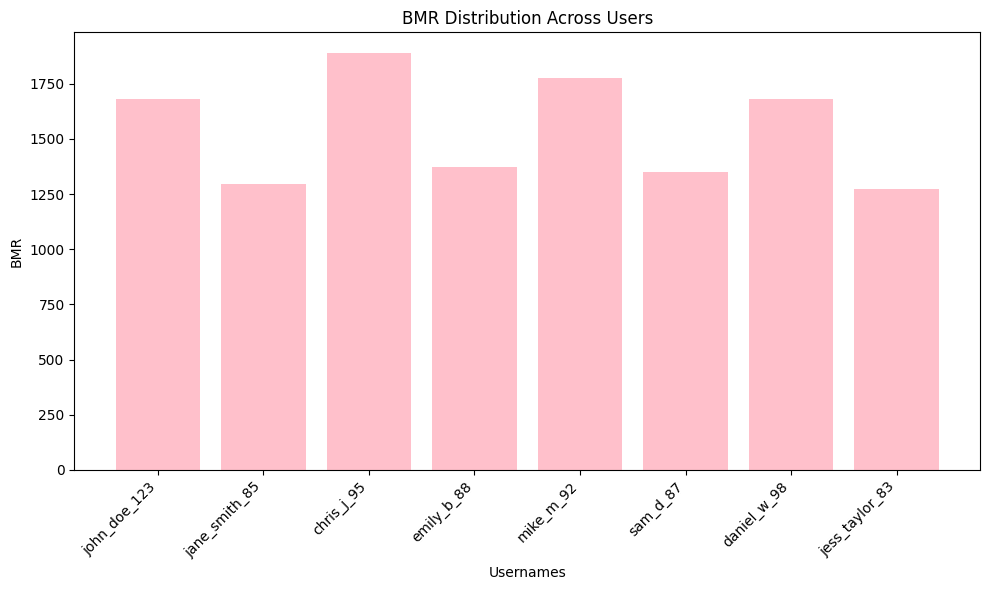

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

"""
    Calculate Basal Metabolic Rate (BMR) based on the Harris-Benedict equation.

    Parameters:
    - row (pd.Series): A row of user data as a Pandas Series.

    Returns:
    float or None: Calculated BMR or None if an error occurs.
"""
def calculate_bmr(row):

    weight = row['weight_kg']
    height = row['height_cm']
    age = row['age']
    gender_abbreviation = row['gender_abbreviation'].lower()

    try:
        select_query = f"""
            SELECT
                CASE
                    WHEN ? = 'm' THEN 66.5 + (13.75 * ?) + (5.003 * ?) - (6.75 * ?)
                    WHEN ? = 'f' THEN 655.1 + (9.563 * ?) + (1.850 * ?) - (4.676 * ?)
                    WHEN ? = 'nb' THEN 66.5 + (13.75 * ?) + (5.003 * ?) - (6.75 * ?) + 7.5
                    ELSE NULL
                END AS bmr
            """
        cursor.execute(select_query, (gender_abbreviation, weight, height, age,
                                      gender_abbreviation, weight, height, age,
                                      gender_abbreviation, weight, height, age))

        result = cursor.fetchone()[0]

        if result is not None:
            return result
        else:
            raise ValueError("Invalid gender. Please provide 'm', 'f', or 'nb' for non-binary.")

    except sqlite3.Error as e:
        print(f"Error calculating BMR: {e}")
        return None

"""
    Calculate and add BMR column to the 'user' table in the SQLite database.

    Parameters:
    - database_path (str): SQLite database file.
"""
def addBMRColumn(database_path):

    cursor.execute("SELECT * FROM user")
    rows = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(rows, columns=columns)
    df['BMR'] = df.apply(calculate_bmr, axis=1)

    df.to_sql('user', connection, index=False, if_exists='replace')

# Example usage of addBMRColumn:
addBMRColumn(data_file)


"""
    Generate a bar plot of BMR distribution across users.

    Parameters:
    - database_path (str): SQLite database file.
"""
def generate_bmr_report(database_path):

    conn = sqlite3.connect(database_path)
    query = "SELECT app_username, BMR FROM user WHERE BMR IS NOT NULL"
    cursor.execute(query)
    bmr_data = cursor.fetchall()
    usernames, bmr_values = zip(*bmr_data)

    # Plotting BMR distribution with a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(usernames, bmr_values, color='pink')
    plt.title('BMR Distribution Across Users')
    plt.xlabel('Usernames')
    plt.ylabel('BMR')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Example usage of generate_bmr_report:
generate_bmr_report(data_file)

In [15]:
class BaseSummaryReport:
  def printCustomContent(self):
    return NotImplemented

  def __init__(self, data_file):
    self.data_file = data_file
    self.printReportHeader()
    self.printCustomContent()
    self.printReportFooter()

  def printReportHeader(self):
    print('-'*80)
    print('>>> SUMMARY REPORT <<<')
    print()
    print('Using data file:', self.data_file)
    print()

    print()
    print('== TABLE METADATA== ')
    print()

    rows = getAllRows(self.data_file)
    for (tbl_name, tbl) in sorted(rows.items()):
      print('Table: {0}'.format(tbl_name))
      print('No. rows: {0:,}'.format(len(tbl)))
      print()
      all_cols = set(tbl[0].keys())

    print()
    print('== COLUMN METADATA ==')
    print()

    numeric = getNumericColumns(self.data_file)
    numeric = set(numeric.keys())
    print('Numeric columns:', ', '.join(sorted(numeric)))

    categorical = getCategoricalColumns(self.data_file)
    categorical = set(categorical.keys())
    print('Categorical columns:', ', '.join(sorted(categorical)))

    free_text = getFreeTextColumns(self.data_file)
    free_text = set(free_text.keys())
    print('Free-text columns:', ', '.join(sorted(free_text)))

    other = all_cols - numeric - categorical - free_text
    print('Other columns:', ', '.join(sorted(other)))

    print()
    print()

  def printReportFooter(self):
    print('>>> END SUMMARY REPORT <<<')
    print('-'*80)

In [16]:
import statistics
from collections import Counter

class SummaryReport(BaseSummaryReport):
  def printCustomContent(self):
    # Get numerical columns and their data
    numeric_columns = getNumericColumns(self.data_file)

    # Print information for each numerical column
    for column, data in numeric_columns.items():
        print(f"\nNumerical Column: {column}")
        print(f"Mean Value: {statistics.mean(data)}")
        print(f"Minimum Value: {min(data)}")
        print(f"Maximum Value: {max(data)}")
        print(f"Standard Deviation: {statistics.stdev(data)}")

    # Get categorical columns and their data
    categorical_columns = getCategoricalColumns(self.data_file)

    # Print information for each categorical column
    for column, data in categorical_columns.items():
        print(f"\nCategorical Column: {column}")
        categories = sorted(set(data))
        print(f"Possible Categories: {', '.join(map(str, categories))}")
        print("Frequency of Each Category:")
        category_counts = Counter(data)
        for category, frequency in category_counts.items():
            print(f"  {category}: {frequency}")

    # Get free-text columns and their data
    free_text_columns = getFreeTextColumns(self.data_file)

    # Print information for each free-text column
    for column, data in free_text_columns.items():
        print(f"\nFree-Text Column: {column}")
        shortest_string = min(data, key=len)
        longest_string = max(data, key=len)
        print(f"Shortest String: {shortest_string}")
        print(f"Longest String: {longest_string}")


# Example usage of SummaryReport:

report = SummaryReport(data_file)


--------------------------------------------------------------------------------
>>> SUMMARY REPORT <<<

Using data file: SQLdatabases.db


== TABLE METADATA== 

Table: activity
No. rows: 9

Table: activity_lookup
No. rows: 4

Table: gender_lookup
No. rows: 3

Table: meal_type_lookup
No. rows: 4

Table: nutrition
No. rows: 32

Table: user
No. rows: 8


== COLUMN METADATA ==

Numeric columns: average_speed_kph, carbohydrates_grams, distance_km, height_cm, protein_grams, weight_kg
Categorical columns: activity_type_abbreviation, gender_abbreviation, meal_type_abbreviation
Free-text columns: activity_app_username, nutrition_app_username, user_app_username, user_first_name, user_last_name
Other columns: app_username, date_of_birth, first_name, last_name



Numerical Column: height_cm
Mean Value: 168.7625
Minimum Value: 155.9
Maximum Value: 180.8
Standard Deviation: 8.986010953540113

Numerical Column: weight_kg
Mean Value: 64.8875
Minimum Value: 50.0
Maximum Value: 80.5
Standard Deviation: